In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import re 

#Fonction pour trouver les codes correspondants à un pays entre les codes de pays et le nom des pays :"
def equiv (x):
    return(df1[df1['Country Name'] == x]['Country Code'][0])

#fonction pour trouver toutes les lignes qui correspondent à un pays où à une variable en particulier

def recherche_ligne (x,y,df) :
    if x == 'Pays' :
        expression = re.compile(y+".*?;")
        return(expression.findall(';'.join(df.index))) 
    else :
        expression = re.compile(".{,4}"+y+";")
        return(expression.findall(';'.join(df.index)))

#
#Si l'utilisateur cherche des lignes en fonction de pays il faut le mettre dans x
#
#sinon on recherche d'autres caractéristiques (/!\ il faut entre le nom avec des caractères regex pour les ( et %)
#
#/!\ Attention /!\ : avec cette fonction on renvoit lsites de chaines de caractères qui correspondent aux noms des
#colonnes + le séparateur qu'on a utilisé ";" il faut donc le supprimer en ne prenant pas le dernier caractères des
#chaines [:,-1]



        

In [184]:
df1['Country Code']

Pays_indic
AGO_Alternative and nuclear energy (% of total energy use)       AGO
AGO_Energy use (kg of oil equivalent per capita)                 AGO
AGO_GDP (current US$)                                            AGO
AGO_GDP growth (annual %)                                        AGO
AGO_Émissions totales de GES (kt d’équivalent CO2)               AGO
                                                                ... 
ZWE_GDP (current US$)                                            ZWE
ZWE_GDP growth (annual %)                                        ZWE
ZWE_Industry (including construction), value added (% of GDP)    ZWE
ZWE_Émissions totales de GES (kt d’équivalent CO2)               ZWE
USA_croissance émissions GES (kt d’équivalent CO2)               NaN
Name: Country Code, Length: 1202, dtype: object

# On va télécharger les bases de données et repérer les variables pertinentes dans chacune des bases

### On commmence par créer les dataframe

Il faut légèrement modifier le fichier csv dézippé pour enlever les deux premières lignes, qui ne comprennent que des infos générales sur le format du fichier mais qui entrainaient un problème d'ouverture via la commande pd.read_csv car elles comportaient des virgules.

On peut ensuite ouvrir sereinement toutes les base modifiées ainsi.

In [3]:
agri_forest = pd.read_csv("chiffre_agri_foret_peche.csv")
augment_pib = pd.read_csv("chiffre_augment_pib.csv")
energie_utilisee = pd.read_csv("chiffre_energie_utilise.csv")
emission_GES = pd.read_csv("chiffre_GES_total.csv")
nucle_total = pd.read_csv('chiffre_nucle_total_nuke_total_fossile.csv')
part_indus_construc = pd.read_csv('chiffre_part_indus_construc.csv')
pib = pd.read_csv("chiffre_pib.csv")
nom_pays = pib['Country Name']

In [4]:
df_list  = [agri_forest, augment_pib, energie_utilisee, emission_GES, nucle_total, part_indus_construc, pib]

### On regarde chaque dataframe pour identifier les variables pertinentes

In [5]:
agri_forest.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
augment_pib.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.369863,4.198232,0.3,5.700001,2.1,1.999999,NaN,NaN,NaN,NaN


In [7]:
energie_utilisee.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
emission_GES.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Émissions totales de GES (kt d’équivalent CO2),EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
nucle_total.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Alternative and nuclear energy (% of total ene...,EG.USE.COMM.CL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
part_indus_construc.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Industry (including construction), value added...",NV.IND.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
pib.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.534637e+09,2.701676e+09,2.765363e+09,2.919553e+09,2.965922e+09,3.056425e+09,NaN,NaN,NaN,NaN


On observe que tous les df sont construits de la même manière. On a le nom du pays, son abréviation, le nom de l'indicateur utilisé, son code, puis sa valeur pour chaque année. On a aussi toujours une colonne vide, qui ne nous gène pas vraiment.

### On nettoie les bases en enlevant les informations qui ne nous intéresse pas

Il faudra enlever la colomne "unnamed", les colomnes qui correpondent aux années qui ne nous intéresssent pas, et éventuellement les lignes (=pays ou région) que l'on ne garde pas.

Par exemple, conserve-t-on les pays comme Aruba dont on ne connait que le PIB? Je pense que la question elle est vite répondue.

Pareil, est-ce que ça a vraiement un intérêt de garder les zones géographiques du type Asie du Sud-Est, etc?  ce ne sont que des aggrégats de pays, donc pas forcément.

### On fusionne les dataframe pour aggréger tous ces indicateurs

On peut envisager plusieurs manières de fusionner ces df. Soit on a en index Pays_Année et les colomnes correspindent chacune à un indice, soit on a Pays_Indicateur et les colonnes correspondent chacune a une année. Ce sont les formats wide et long (cf tp2).

Pour des raisons de lisibilité, il est évident que l'on va conserver le nom de l'indicateur, et non pas son nom de code. En revanche, il faudra voir à l'usage si on préfère utiler le nom complet des pays ou seulement leur nom de code

In [12]:
#On a ici la syntaxe qui permet de créer une nouvelle colomne en lui domnant le nom que l'on souhaite
pib['Pays_indic'] = pib['Country Code'].str[:3] + '_pib'

In [13]:
#On fait ici la modif sur tous les df à l'aide d'une boucle for, 
#mais ça peut donner des noms de variable un peu long à manipuler
for df in df_list :
    df['Pays_indic'] = df['Country Code'].str[:3] + '_' + df['Indicator Name'].str[:99]
#part_indus_construc['Pays_indic']

On concatène les df, on les trie et on met en index la variable créée à cet effet ci-dessus.

In [14]:
df = pd.concat(df_list)
df = df.sort_values('Pays_indic').set_index('Pays_indic')
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
Pays_indic,,,,,,,,,,,,,,,,,,,,,
"ABW_Agriculture, forestry, and fishing, value added (% of GDP)",Aruba,ABW,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABW_Alternative and nuclear energy (% of total energy use),Aruba,ABW,Alternative and nuclear energy (% of total ene...,EG.USE.COMM.CL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABW_Energy use (kg of oil equivalent per capita),Aruba,ABW,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABW_GDP (current US$),Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.534637e+09,2.701676e+09,2.765363e+09,2.919553e+09,2.965922e+09,3.056425e+09,NaN,NaN,NaN,NaN
ABW_GDP growth (annual %),Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.369863e+00,4.198232e+00,3.000000e-01,5.700001e+00,2.100000e+00,1.999999e+00,NaN,NaN,NaN,NaN


### Suppression des colonnes et lignes inutiles

On a ici la liste des colonnes que l'on supprimme pour se restreindre aux données qui nous intéressent, sutrement dit à partir de 1980 (je ne sais plsu si on avait dit 1980 ou 1985).

In [15]:
useless_data_list = ['Unnamed: 65', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', 
                   '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '2020']
df = df.drop(useless_data_list, axis = 1)
#df.sample(15)

On va chercher à enlever les lignes qui ne contiennent que peu d'infos (au moins 10 valeurs manquantes)

In [16]:
df1 = df
nan_dict = {}
for i in range(len(df1.index)) :
    nb_nan = df1.iloc[i].isnull().sum()
    if nb_nan >10 :
        nan_dict[list(df.index)[i]] = nb_nan
nan_dict

{'ABW_Agriculture, forestry, and fishing, value added (% of GDP)': 25,
 'ABW_Alternative and nuclear energy (% of total energy use)': 40,
 'ABW_Energy use (kg of oil equivalent per capita)': 40,
 'ABW_Industry (including construction), value added (% of GDP)': 25,
 'ABW_Émissions totales de GES (kt d’équivalent CO2)': 32,
 'AFG_Agriculture, forestry, and fishing, value added (% of GDP)': 22,
 'AFG_Alternative and nuclear energy (% of total energy use)': 40,
 'AFG_Energy use (kg of oil equivalent per capita)': 40,
 'AFG_GDP (current US$)': 20,
 'AFG_GDP growth (annual %)': 23,
 'AFG_Industry (including construction), value added (% of GDP)': 22,
 'AGO_Agriculture, forestry, and fishing, value added (% of GDP)': 16,
 'AGO_Industry (including construction), value added (% of GDP)': 16,
 'ALB_Agriculture, forestry, and fishing, value added (% of GDP)': 16,
 'ALB_Industry (including construction), value added (% of GDP)': 16,
 'AND_Agriculture, forestry, and fishing, value added (% of GDP)'

In [17]:
df1 = df1.drop(index = nan_dict.keys(), axis = 0)
df1.shape

(1259, 43)

En faisant cela, on supprme environ 600 lignes. Pour le rafiner, il faudrait voir si l'on ne doit pas supprimer toutes les données d'un pays lorsque l'on a que des infos sur deux ou trois indicateurs (notamment qi que sur le PIB). On doit pouvoir s'en sortir en supprimant tous les indexs qui commencent par le code du pays détecté de cette manière.

[Adrien]La fonction pour récupérer les indexs des pays où on a moins de 3 indicateurs.

In [18]:
liste_pays_dic ={}

In [19]:
for i in nom_pays : 
    compter_nb_indic = df1.apply(lambda x: True if x['Country Name'] == i else False, axis = 1)
    if len(compter_nb_indic[compter_nb_indic == True].index) <3 :
        liste_pays_dic[i] = compter_nb_indic[compter_nb_indic == True].index

On supprime les lignes des pays dont on a trop peu d'indicateurs complet :

In [20]:
for i in liste_pays_dic.keys():
    df1 = df1.drop(index = liste_pays_dic[i], axis = 1)

In [31]:
df1.shape

(1201, 43)

On a supprimer en tout 58 lignes. 

In [108]:
recherche_ligne('Pays','FRO',df)

'FRO_Alternative and nuclear energy (% of total energy use)'

# Début des statistiques descriptives :

On créé un vecteur temps pour pouvoir créer des graphiques en fonction du temps facilement.

In [24]:
t = np.linspace(1980,2019,40)

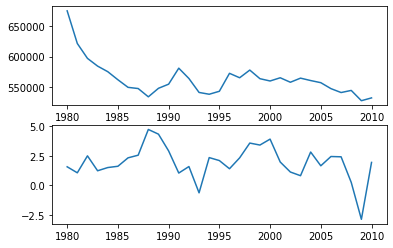

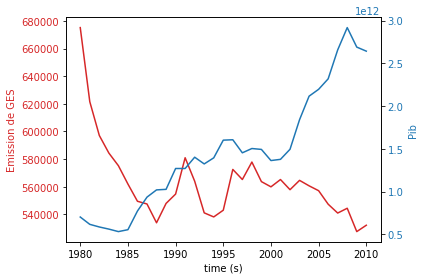

In [25]:
#Sur deux subplots différents
plt.subplot(211)
plt.plot(t[0:31],df1.loc['FRA_Émissions totales de GES (kt d’équivalent CO2)'][2:42].to_numpy()[1:32].T)
plt.subplot(212)
plt.plot(t[0:31],df1.loc['FRA_GDP growth (annual %)'][2:42].to_numpy()[1:32].T)

plt.show()

#Sur le même plot\n",

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Emission de GES', color=color)
ax1.plot(t[0:31], df1.loc['FRA_Émissions totales de GES (kt d’équivalent CO2)'][2:42].to_numpy()[1:32].T, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  #  commence un deuxième axe qui partage le même axe x

color = 'tab:blue'
ax2.set_ylabel('PIB', color=color)  
ax2.plot(t[0:31], df1.loc['FRA_GDP (current US$)'][2:42].to_numpy()[1:32].T, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

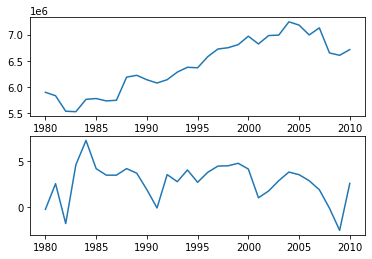

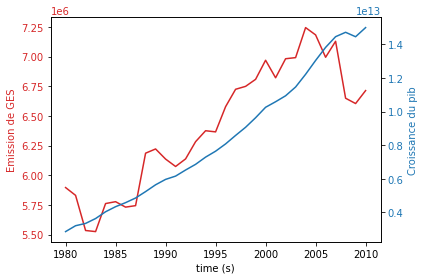

In [26]:
#Sur deux subplots différents
plt.subplot(211)
plt.plot(t[0:31],df1.loc['USA_Émissions totales de GES (kt d’équivalent CO2)'][2:42].to_numpy()[1:32].T)
plt.subplot(212)
plt.plot(t[0:31],df1.loc['USA_GDP growth (annual %)'][2:42].to_numpy()[1:32].T)

plt.show()

#Sur le même plot\n",

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Emission de GES', color=color)
ax1.plot(t[0:31], df1.loc['USA_Émissions totales de GES (kt d’équivalent CO2)'][2:42].to_numpy()[1:32].T, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  #  commence un deuxième axe qui partage le même axe x

color = 'tab:blue'
ax2.set_ylabel('PIB', color=color)  
ax2.plot(t[0:31], df1.loc['USA_GDP (current US$)'][2:42].to_numpy()[1:32].T, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


On va créer un nouvel indicateur qui va nous donner la croissance à l'année des gazs à effet de serre pour chaque pays :

In [193]:
for i in recherche_ligne('','Émissions totales de GES \(kt d’équivalent CO2\)',df1) :
    df1.loc[i[0:3]+'_croissance émissions GES (kt d’équivalent CO2)'] = df1.loc[i[:-1]][3:44].astype(np.float64).diff()
    print(df1.loc[i[0:3]+'_croissance émissions GES (kt d’équivalent CO2)'])

Country Name          NaN
Country Code          NaN
Indicator Name        NaN
1980                  NaN
1981             -6107.07
1982              3349.01
1983             -391.742
1984             -8973.76
1985               835.89
1986             -731.777
1987              10738.8
1988             -10984.5
1989              3606.22
1990              11463.6
1991             -7045.46
1992              21236.8
1993             -25222.7
1994              4882.14
1995              3573.06
1996             -1094.08
1997               -14045
1998               2183.9
1999                844.3
2000             -1338.74
2001              -408.84
2002              118.528
2003              1367.65
2004              1002.22
2005             -1004.49
2006              520.084
2007              314.712
2008               705.76
2009              913.171
2010              1719.93
2011               849.26
2012              778.513
2013                  NaN
2014                  NaN
2015        

Name: BDI_croissance émissions GES (kt d’équivalent CO2), dtype: object
Country Name          NaN
Country Code          NaN
Indicator Name        NaN
1980                  NaN
1981             -11611.6
1982              -9168.3
1983             -8874.06
1984              4068.82
1985             -2132.74
1986              -42.214
1987               -881.4
1988              750.669
1989               411.57
1990              -82.062
1991              4880.77
1992             -1623.11
1993             -2372.12
1994              5640.08
1995              2314.19
1996              6602.12
1997             -3804.78
1998              2665.14
1999             -4675.01
2000               -448.6
2001              -2516.2
2002             -6486.48
2003              5983.06
2004             -2843.58
2005             -4491.95
2006             -1893.29
2007             -2979.58
2008               5390.7
2009             -6103.58
2010              6919.12
2011             -511.543
2012             -

Name: BMU_croissance émissions GES (kt d’équivalent CO2), dtype: object
Country Name          NaN
Country Code          NaN
Indicator Name        NaN
1980                  NaN
1981             -16998.5
1982              8998.99
1983               4589.6
1984             -38404.8
1985              8488.56
1986              8156.92
1987              34612.5
1988             -30051.7
1989               2598.3
1990              24217.5
1991             -9483.82
1992              11657.4
1993              19170.3
1994             -57458.9
1995              13841.3
1996              5749.33
1997              2949.52
1998             -43055.9
1999                89859
2000              -134473
2001             -29176.8
2002              48477.1
2003              13896.3
2004               127974
2005              56887.1
2006              -145244
2007              63347.1
2008              -107559
2009             -43577.3
2010              26474.5
2011               518081
2012              

Country Name          NaN
Country Code          NaN
Indicator Name        NaN
1980                  NaN
1981             -1687.67
1982             -3483.63
1983              5370.72
1984             -1287.42
1985              3831.45
1986             -328.651
1987              186.826
1988             -1545.84
1989              706.966
1990              1460.13
1991              1460.04
1992             -347.908
1993             -2638.49
1994             -30.6015
1995             -259.192
1996              344.191
1997             -1309.33
1998              757.168
1999             -119.059
2000             -1187.41
2001              1012.16
2002             -1077.96
2003              1555.33
2004              669.808
2005              660.287
2006             -120.843
2007             -1649.52
2008              2522.41
2009             -1388.92
2010              1908.21
2011             -4087.32
2012              1041.23
2013                  NaN
2014                  NaN
2015        

Name: COM_croissance émissions GES (kt d’équivalent CO2), dtype: object
Country Name          NaN
Country Code          NaN
Indicator Name        NaN
1980                  NaN
1981              34.0783
1982             -245.559
1983              148.018
1984              248.455
1985              -89.035
1986              100.087
1987              27.7988
1988              242.873
1989               287.65
1990              171.929
1991              317.305
1992              1213.37
1993             -70.5589
1994               403.39
1995             -402.445
1996             -147.563
1997              17.3216
1998              650.729
1999             -236.784
2000             -487.283
2001              1066.07
2002             -919.167
2003              417.669
2004              155.825
2005             -476.428
2006              619.886
2007              582.903
2008             -491.486
2009               261.21
2010              616.817
2011               310.12
2012              

Name: DNK_croissance émissions GES (kt d’équivalent CO2), dtype: object
Country Name          NaN
Country Code          NaN
Indicator Name        NaN
1980                  NaN
1981              -703.08
1982              506.229
1983              1179.41
1984              524.986
1985             -1008.98
1986              879.307
1987              336.486
1988              1104.42
1989              890.131
1990             -1029.98
1991              836.219
1992              1978.08
1993             -185.111
1994              1596.23
1995              817.388
1996              1289.62
1997               1679.3
1998              1820.17
1999              223.183
2000              1435.97
2001             -75.9647
2002              837.086
2003             -886.196
2004              126.869
2005              753.795
2006              387.931
2007              757.426
2008              252.929
2009             -146.229
2010              1168.86
2011              909.451
2012              

Country Name          NaN
Country Code          NaN
Indicator Name        NaN
1980                  NaN
1981              1547.34
1982              513.079
1983             -809.099
1984               1319.9
1985               1134.5
1986              1155.49
1987             -279.597
1988              1731.88
1989              116.731
1990              880.842
1991              1170.26
1992              1068.61
1993              511.564
1994               3012.4
1995               2362.4
1996              2266.09
1997              137.556
1998             -725.347
1999             -3289.11
2000              2431.21
2001              1361.74
2002              1449.41
2003              1506.13
2004              1809.42
2005              1117.51
2006              1446.25
2007               1306.3
2008             -2198.58
2009              1845.02
2010               872.37
2011              1272.97
2012              1152.91
2013                  NaN
2014                  NaN
2015        

Name: GAB_croissance émissions GES (kt d’équivalent CO2), dtype: object
Country Name          NaN
Country Code          NaN
Indicator Name        NaN
1980                  NaN
1981             -17197.5
1982             -16581.3
1983             -9578.48
1984             -32374.8
1985              35759.6
1986              19451.1
1987              -337.96
1988              2143.81
1989             -11947.9
1990               1325.1
1991              5393.12
1992             -21617.8
1993             -27444.1
1994             -4897.71
1995              -341.66
1996              16026.7
1997             -28177.3
1998             -11017.8
1999             -25065.2
2000             -6205.07
2001              9182.68
2002             -21507.7
2003              9420.99
2004             -8075.75
2005             -3809.51
2006             -776.848
2007             -11919.1
2008               -10995
2009             -50476.3
2010              24645.7
2011             -41524.7
2012              

Name: HKG_croissance émissions GES (kt d’équivalent CO2), dtype: object
Country Name          NaN
Country Code          NaN
Indicator Name        NaN
1980                  NaN
1981             -866.656
1982              2630.04
1983             -836.221
1984              969.878
1985             -153.793
1986              603.224
1987              664.567
1988              512.851
1989             -673.451
1990             -107.775
1991              1716.22
1992             -1051.69
1993              986.627
1994              258.373
1995              1191.12
1996               364.23
1997             -1068.22
1998              6719.43
1999             -8840.63
2000              7932.06
2001             -9392.71
2002              2331.67
2003              7923.88
2004             -7786.22
2005              8200.66
2006             -6520.26
2007              2491.88
2008              607.323
2009              91.6988
2010              -213.84
2011              420.421
2012              

Name: IDB_croissance émissions GES (kt d’équivalent CO2), dtype: object
Country Name              NaN
Country Code              NaN
Indicator Name            NaN
1980                      NaN
1981                 -76387.2
1982              1.85084e+06
1983             -1.38322e+06
1984                  -394115
1985                  33777.3
1986                   372605
1987                   643216
1988                  -946952
1989                  74812.6
1990                   276323
1991              1.04776e+06
1992                  -115378
1993                  -700982
1994                   759722
1995                  -840662
1996                 -1509.92
1997              3.72678e+06
1998             -3.84965e+06
1999                  -522300
2000                 -46422.9
2001                   227481
2002                   870500
2003                  -831799
2004                   171567
2005                   110829
2006              1.21025e+06
2007             -1.60835e+0

Name: JAM_croissance émissions GES (kt d’équivalent CO2), dtype: object
Country Name          NaN
Country Code          NaN
Indicator Name        NaN
1980                  NaN
1981              1067.57
1982              766.848
1983              832.831
1984              971.589
1985              470.898
1986              580.976
1987              415.947
1988             -14.8607
1989              207.126
1990              765.565
1991              293.346
1992              2046.11
1993              494.132
1994              599.123
1995              802.033
1996              571.675
1997              425.046
1998               328.63
1999             -24.3377
2000              663.941
2001             -141.668
2002              1177.28
2003             -106.624
2004                 2154
2005              1457.72
2006              483.347
2007               1077.5
2008              568.531
2009             -153.468
2010               1274.4
2011              850.724
2012              

Name: LBY_croissance émissions GES (kt d’équivalent CO2), dtype: object
Country Name           NaN
Country Code           NaN
Indicator Name         NaN
1980                   NaN
1981               54.7786
1982               35.5269
1983               25.8297
1984              -2.47883
1985              -21.1162
1986              -16.0818
1987              0.985833
1988               41.4057
1989               4.73158
1990              -13.3933
1991               3.94803
1992               2.73329
1993              -19.9427
1994               47.2216
1995               22.0691
1996               13.5516
1997              -17.1695
1998                   NaN
1999                   NaN
2000                   NaN
2001               3.32451
2002               4.05431
2003               15.0203
2004               42.9973
2005               2.73481
2006                20.021
2007               19.1657
2008               21.4194
2009              0.683385
2010                 29.56
2011      

Name: LSO_croissance émissions GES (kt d’équivalent CO2), dtype: object
Country Name              NaN
Country Code              NaN
Indicator Name            NaN
1980                      NaN
1981                  -189120
1982                   182562
1983                   314712
1984                 -43656.8
1985                   105793
1986                   382138
1987                   396522
1988                   288898
1989                   130244
1990                   441549
1991                  -119852
1992                  -158449
1993                   221536
1994                  -476989
1995                   520431
1996                   283363
1997                  -346055
1998              1.71446e+06
1999             -1.95875e+06
2000                 -56927.3
2001                 -1432.98
2002              1.13667e+06
2003              1.39615e+06
2004                   330573
2005              1.26607e+06
2006                   296698
2007              1.61869e+0

Name: MIC_croissance émissions GES (kt d’équivalent CO2), dtype: object
Country Name          NaN
Country Code          NaN
Indicator Name        NaN
1980                  NaN
1981             -2706.78
1982              2996.65
1983             -2667.16
1984             -1132.74
1985             -2252.88
1986              422.585
1987              819.342
1988             -538.784
1989              1802.93
1990              4624.97
1991             -4145.28
1992              2925.07
1993             -1029.47
1994              379.101
1995              2559.45
1996             -144.754
1997              894.795
1998              54179.2
1999             -7983.23
2000             -8187.39
2001              13843.9
2002             -4255.97
2003             -12526.6
2004              21088.7
2005             -1312.45
2006              -3501.7
2007             -8832.99
2008                12146
2009             -12786.1
2010              2723.61
2011              306.301
2012              

Name: NAM_croissance émissions GES (kt d’équivalent CO2), dtype: object
Country Name          NaN
Country Code          NaN
Indicator Name        NaN
1980                  NaN
1981              113.054
1982              307.972
1983              242.276
1984             -2297.44
1985             -725.048
1986              159.475
1987              15.9486
1988              487.803
1989              226.134
1990              198.466
1991              234.466
1992              412.778
1993              15.6045
1994              403.461
1995              189.847
1996               217.41
1997              192.748
1998              1805.55
1999              920.315
2000             -197.178
2001             -142.112
2002             -1655.54
2003              243.641
2004             -378.876
2005              1067.13
2006             -82.3974
2007              794.159
2008             -478.862
2009              39.5039
2010              688.575
2011              122.614
2012              

Name: OSS_croissance émissions GES (kt d’équivalent CO2), dtype: object
Country Name          NaN
Country Code          NaN
Indicator Name        NaN
1980                  NaN
1981              5301.95
1982              6273.13
1983              2369.73
1984              4382.93
1985              5575.72
1986              5198.51
1987              1300.09
1988              14127.2
1989              4431.09
1990               5009.8
1991              3409.35
1992              9233.77
1993              9648.84
1994              6219.78
1995              8186.94
1996              10830.4
1997              5825.51
1998              8401.86
1999              12304.3
2000              736.724
2001              3235.91
2002              6369.43
2003                14661
2004              19398.9
2005              8120.69
2006              15019.8
2007              22255.4
2008              2142.01
2009              4692.28
2010              11284.4
2011              7946.47
2012              

Name: PST_croissance émissions GES (kt d’équivalent CO2), dtype: object
Country Name          NaN
Country Code          NaN
Indicator Name        NaN
1980                  NaN
1981              3207.87
1982              -1324.5
1983              10342.9
1984             -7904.13
1985             -321.628
1986              3309.94
1987             -1959.95
1988              12802.1
1989             -5658.96
1990             -31647.2
1991             -42653.3
1992             -18466.3
1993             -11656.5
1994             -3577.89
1995              6271.93
1996              4633.78
1997             -14522.4
1998               -19865
1999             -17823.2
2000              3006.93
2001              5110.05
2002              -2577.2
2003              5967.77
2004              -1246.6
2005             -303.394
2006              4804.38
2007             -3339.49
2008             -4208.12
2009             -17186.7
2010             -1717.51
2011              8263.72
2012             -

Name: SSF_croissance émissions GES (kt d’équivalent CO2), dtype: object
Country Name          NaN
Country Code          NaN
Indicator Name        NaN
1980                  NaN
1981              10189.5
1982              3307.38
1983              6401.45
1984             -9073.09
1985              411.197
1986              4935.62
1987              11920.1
1988              -4218.1
1989              3116.54
1990              3042.77
1991             -10903.3
1992             -19867.7
1993             -16151.5
1994             -1499.26
1995              5046.87
1996             -3797.64
1997             -15482.5
1998              95215.2
1999              13552.1
2000             -10784.5
2001              14814.1
2002             -26613.7
2003              10280.5
2004                25895
2005              6531.34
2006              47745.8
2007             -27296.9
2008              88789.5
2009             -46587.7
2010              81190.1
2011              14008.2
2012              

Country Name              NaN
Country Code              NaN
Indicator Name            NaN
1980                      NaN
1981                 -26542.9
1982                  48682.3
1983                    46716
1984                  57491.4
1985                    63891
1986                   145388
1987                  78906.5
1988                   128615
1989                   -13128
1990                   567294
1991                  -393104
1992                  -521628
1993                  -243564
1994                  -517550
1995                  -106415
1996                  29116.6
1997                  -353711
1998                   881179
1999             -1.00702e+06
2000                   317589
2001                  -139717
2002                   427314
2003                   585491
2004             -1.08195e+06
2005                   120849
2006                   316770
2007                  -100796
2008                   413267
2009                  -603777
2010      

Name: TUN_croissance émissions GES (kt d’équivalent CO2), dtype: object
Country Name          NaN
Country Code          NaN
Indicator Name        NaN
1980                  NaN
1981              3487.33
1982              8498.81
1983              4508.82
1984              6962.98
1985              5045.71
1986              11745.1
1987              6404.84
1988              5055.44
1989              13486.9
1990              12311.9
1991              2269.39
1992                11178
1993              6994.79
1994              -4007.8
1995                20310
1996              16797.1
1997              11680.6
1998              6203.74
1999             -331.556
2000              20911.6
2001             -18900.7
2002                12497
2003                13720
2004              9716.45
2005              14097.5
2006                29561
2007              29142.2
2008             -7116.35
2009              5454.82
2010              18085.2
2011              12076.6
2012              

Name: VNM_croissance émissions GES (kt d’équivalent CO2), dtype: object
Country Name          NaN
Country Code          NaN
Indicator Name        NaN
1980                  NaN
1981              15.0067
1982             -15.8688
1983              4.67326
1984             -20.0519
1985              48.4173
1986              1.79501
1987              10.9603
1988              27.0752
1989             -8.49713
1990              32.0157
1991             -12.8173
1992             -15.7763
1993              22.9201
1994             -2.52362
1995              1.19737
1996              5.48562
1997              9.79394
1998              2.73456
1999              8.86377
2000              9.40988
2001             -5.53719
2002             -13.5693
2003             -2.19206
2004             -6.29098
2005              1.08669
2006             -4.85836
2007              13.2262
2008              4.13771
2009             -21.7842
2010              6.90714
2011              6.38689
2012              

Maintenant qu'on à la croissance des émissions de gazs à effet de serre par an, on va essayer de regresser dessus la croissance du PIB [à faire : suite au prochain épisode]

# ANNEXE : Comment on a galéré à ouvrir ces putains de fichier de merde

In [27]:
emission_GES = pd.read_csv("chiffre_GES_total.csv", skiprows = [0,1])
emission_GES.head(2)

,Afghanistan,AFG,Émissions totales de GES (kt d’équivalent CO2),EN.ATM.GHGT.KT.CE,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,18168.86,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
0,Angola,AGO,Émissions totales de GES (kt d’équivalent CO2),EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,41657.164846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albanie,ALB,Émissions totales de GES (kt d’équivalent CO2),EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,8898.640911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#print(emmisssion_GES["Country Name"])    #ça retourne une erreur : ce n'est pas un nom de variable
#print(emission_GES['Last Updated Date'])   #c'est bien une variable
print(emission_GES.index)

RangeIndex(start=0, stop=262, step=1)


On a bien un système de multiindex ici, qui semble être mal fait puisque les seules variables restantes dans ce df sont les trois dernières colonnes (last updated, date et unnamed), ce qui n'est pas intéressant. En fait il n'arrive pas à lire corrrectement le fichier csv, d'où le problème. 
Il faut donc trouver comment supprimer ce problème, i.e. faire en sorte que le read_csv ne détecte pas la ligne 'Last Updated Date,"2020-10-15",' comme la liste des variables de notre df. Le plus simple serait de supprimer cette ligne via le document ecxel, mais lorsque l'on sauvegarde ces modifications on altère le document (problème d'encodage et de mise en page), ce qui rend cettte solution impraticable.
On va donc tenter d'ouvrir le document modififié (où l'on a enlevé la ligne qui pose problème) avec un pd.open_excel

In [ ]:
GES = pd.read_excel('chiffre_GES_total.xlsx')
GES.head(3)

Ca ne marche pas non plus : il considèe que le doc xlsx n'a qu'une (très longue) colomne. Il interprète donc l'ensemble de la base de données comme un index, ce qui est assez inutile...
Comme on est intelligent , on modifie avec le bloc notes pour enlever les premières lignes, et ça MARCHE

In [ ]:
emission_GES = pd.read_csv("chiffre_GES_total1.csv")
emission_GES.head(10)